In [1]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy.stats import norm

In [2]:
tree=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_collectionsNoBIB.root")["tracks_tree"]
treeBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsBIB1[123]0.root")["tracks_tree"]
treeNOBIB=uproot.open("/Users/isaac/Desktop/mucolstudies/ntup_hitsNoBIB.root")["tracks_tree"]

In [3]:
print(tree.keys())

['x', 'y', 'z', 't', 'barOrEnd', 'location', 'module', 'layer', 'side']


In [4]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [5]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [24]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
plt.rcParams.update({'axes.labelsize' : "large"}) 

# Investigating per layer occupancy rates

In [7]:
layerPerModule={
    1 : 8,
    2 : 8,
    3 : 3,
    4 : 7,
    5 : 3,
    6 : 4
} #dictionairy to help loop over all layers later

In [8]:
layersBeforeModule={
    1 : 0,
    2 : 8,
    3 : 16,
    4 : 19,
    5 : 26,
    6 : 29
}#Function to help with hashing

In [34]:
density=np.zeros((33)) #initializing a array to keep track of densities for each layer
hits=np.zeros((33)) #initializing a array to keep track of hits for each layer
surfacearea=np.zeros((33)) #initializing a array to keep track of area for each layer

In [88]:
for i in range(1,7):
    inModule=(treeBIB["module"].array()==(i))
    print("i:")
    print(i)
    print("j:")
    for j in range(layerPerModule[i]):
        print(j)
        inData=((treeBIB["layer"].array()==j) & inModule)
        #Getting all of the data needed to calculate occupancy rates
        x=treeBIB["x"].array()[inData]
        z=treeBIB["z"].array()[inData]
        #Calculate surface area for barrel layers
        if layerPerModule[i] % 2 ==0:
            area=(np.pi*(max(x)-min(x)))*(max(z)-min(z))
        #Calculate surface area for endcaps
        else:
            area=(np.pi*(max(x)-min(x))**2)/4
        hits[layersBeforeModule[i]+j]=len(x)
        surfacearea[layersBeforeModule[i]+j]=area/100
        density[layersBeforeModule[i]+j]=(len(x)/(2*area))*100 #Calculating density and then converting to cm^2 (x and z data are in mm)

i:
1
j:
0
1
2
3
4
5
6
7
i:
2
j:
0
1
2
3
4
5
6
7
i:
3
j:
0
1
2
i:
4
j:
0
1
2
3
4
5
6
i:
5
j:
0
1
2
i:
6
j:
0
1
2
3


In [89]:
print(density)

[9.39681675e+02 7.54488693e+02 2.19858006e+02 2.13998429e+02
 1.15132869e+02 1.07466207e+02 7.01324156e+01 6.85131598e+01
 9.59897840e+01 9.36556414e+01 7.93290106e+01 7.72897828e+01
 5.40164828e+01 5.20379497e+01 2.80180781e+01 2.75776179e+01
 1.75369518e+03 1.17938277e+02 3.95921126e+01 7.25675538e+01
 4.45385502e+01 3.67706062e+01 2.69527305e+01 2.21726622e+01
 1.54374299e+01 1.24583300e+01 2.12379000e+01 7.68228789e+00
 3.26723890e+00 8.10085801e-01 1.19746500e+00 9.89819013e-01
 8.31700817e-01]


In [90]:
print(surfacearea)

[2.54058908e+02 2.69546120e+02 4.29008713e+02 4.44678499e+02
 6.14051405e+02 6.30091095e+02 8.40545694e+02 8.56711326e+02
 1.13574065e+03 1.16804496e+03 1.71680573e+03 1.73362500e+03
 2.85028740e+03 2.87536309e+03 3.99861474e+03 4.02072436e+03
 5.27415772e+02 3.68614424e+03 9.72984201e+03 5.72857948e+03
 9.65606195e+03 9.57831638e+03 9.80614932e+03 9.64090365e+03
 9.52396228e+03 9.67091901e+03 2.12624365e+04 4.20308383e+04
 7.00617577e+04 2.35205332e+05 2.91519168e+05 3.38749302e+05
 3.94199444e+05]


In [ ]:
exactArea=layer_area = [270.40, 270.40, 448.50, 448.50, 655.20, 655.20, 904.80, 904.80,  # VXD barrel
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,  # VXD endcaps
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,
                      8117.85, 22034.16, 51678.81,  # IT barrel
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,  # IT endcaps
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,
                      140032.91, 194828.39, 249623.88,  # OT barrel
                      69545.45, 69545.45, 69545.45, 69545.45,  # OT endcaps
                      69545.45, 69545.45, 69545.45, 69545.45]

In [91]:
label=[]
for i in range(6):
    #Adding the SI tracker type to the label
    if i//2==0:
        cur="V"
    elif i//2 ==1:
        cur="I"
    else:
        cur="O"
    
    #Adding if its an endcap or a barrel to label
    if (i %2)==0:
        cur+="B"
    else:
        cur+="E"
        
    for j in range(layerPerModule[i+1]):
        label.append(cur+str(j))

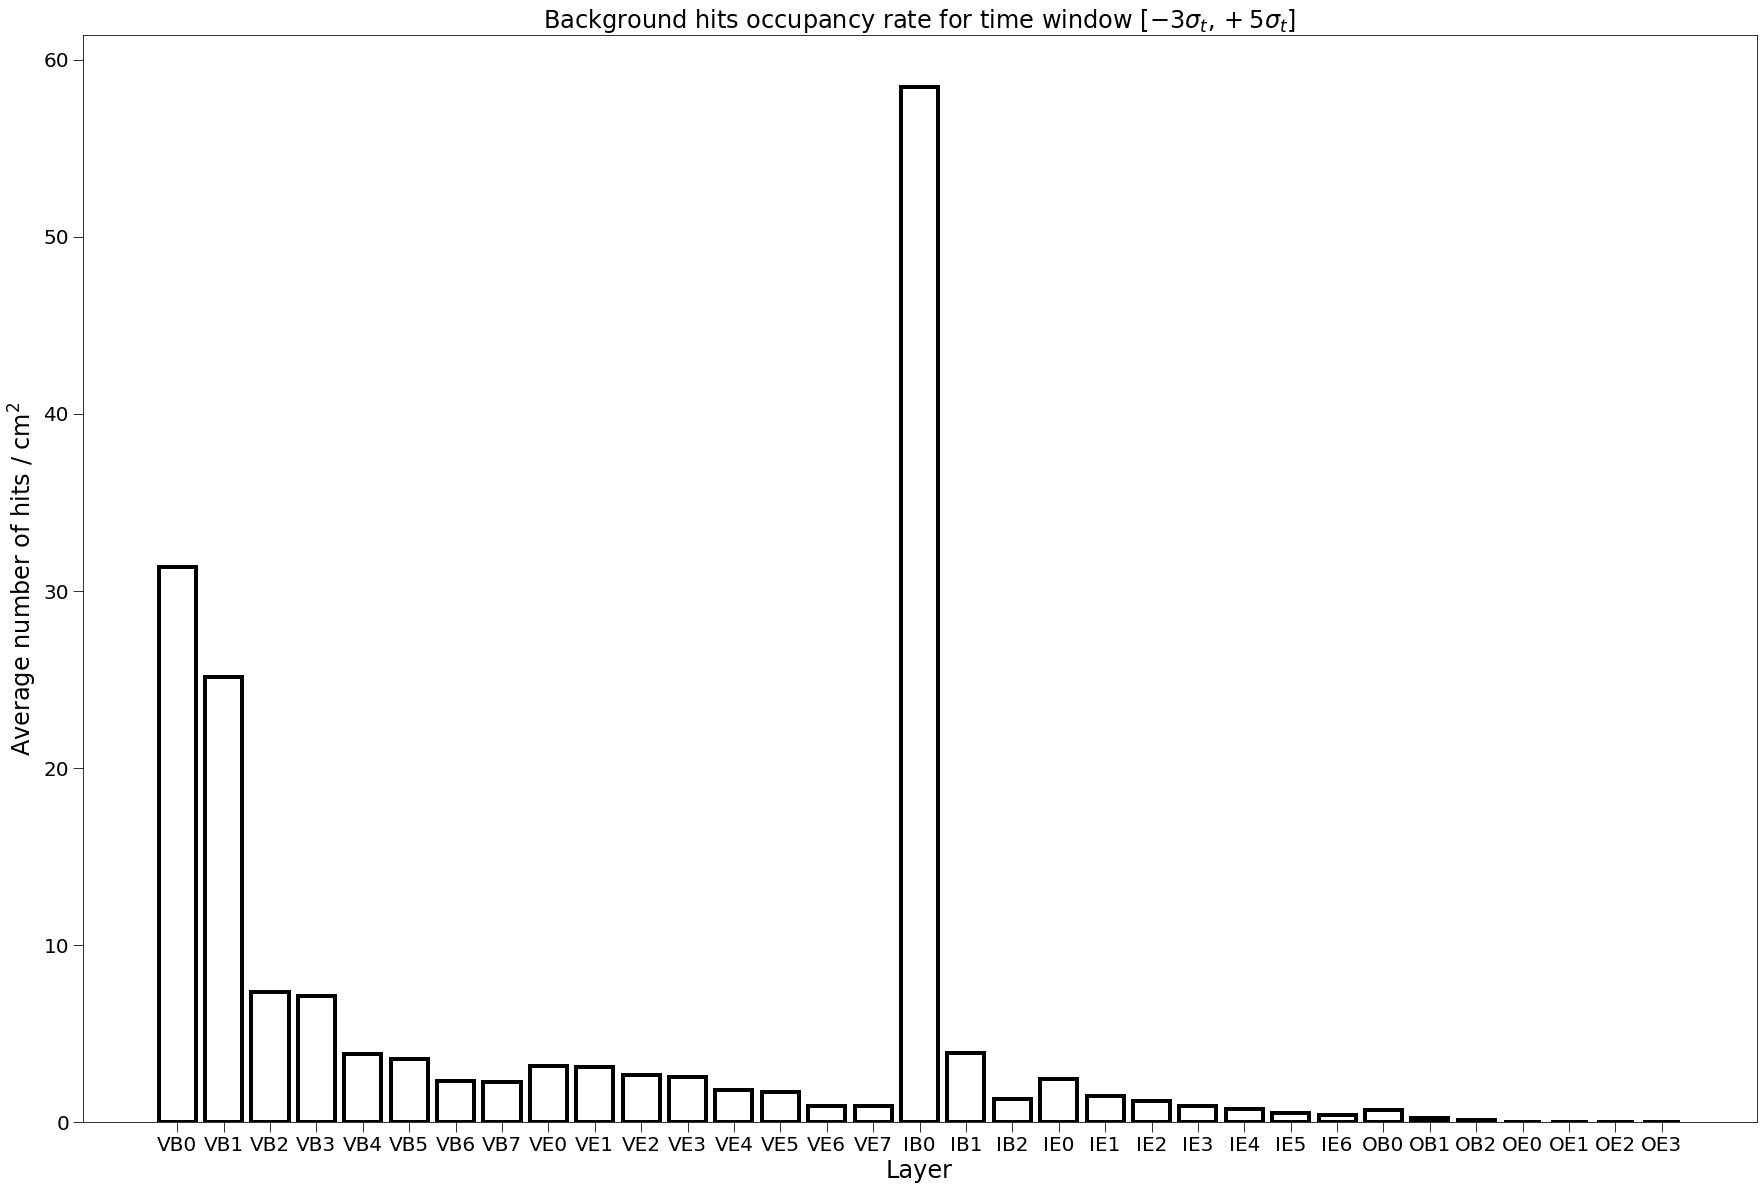

In [92]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
#plt.rcParams.update({'axes.labelsize' : "large"}) 

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
ax.bar(label, density/30, fill=False, linewidth=4)
ax.set_ylabel(f"Average number of hits / cm$^2$")
ax.set_xlabel("Layer")
ax.set_title("Background hits occupancy rate for time window $[-3\sigma_t,+5\sigma_t]$")
plt.savefig("occupancy.png")

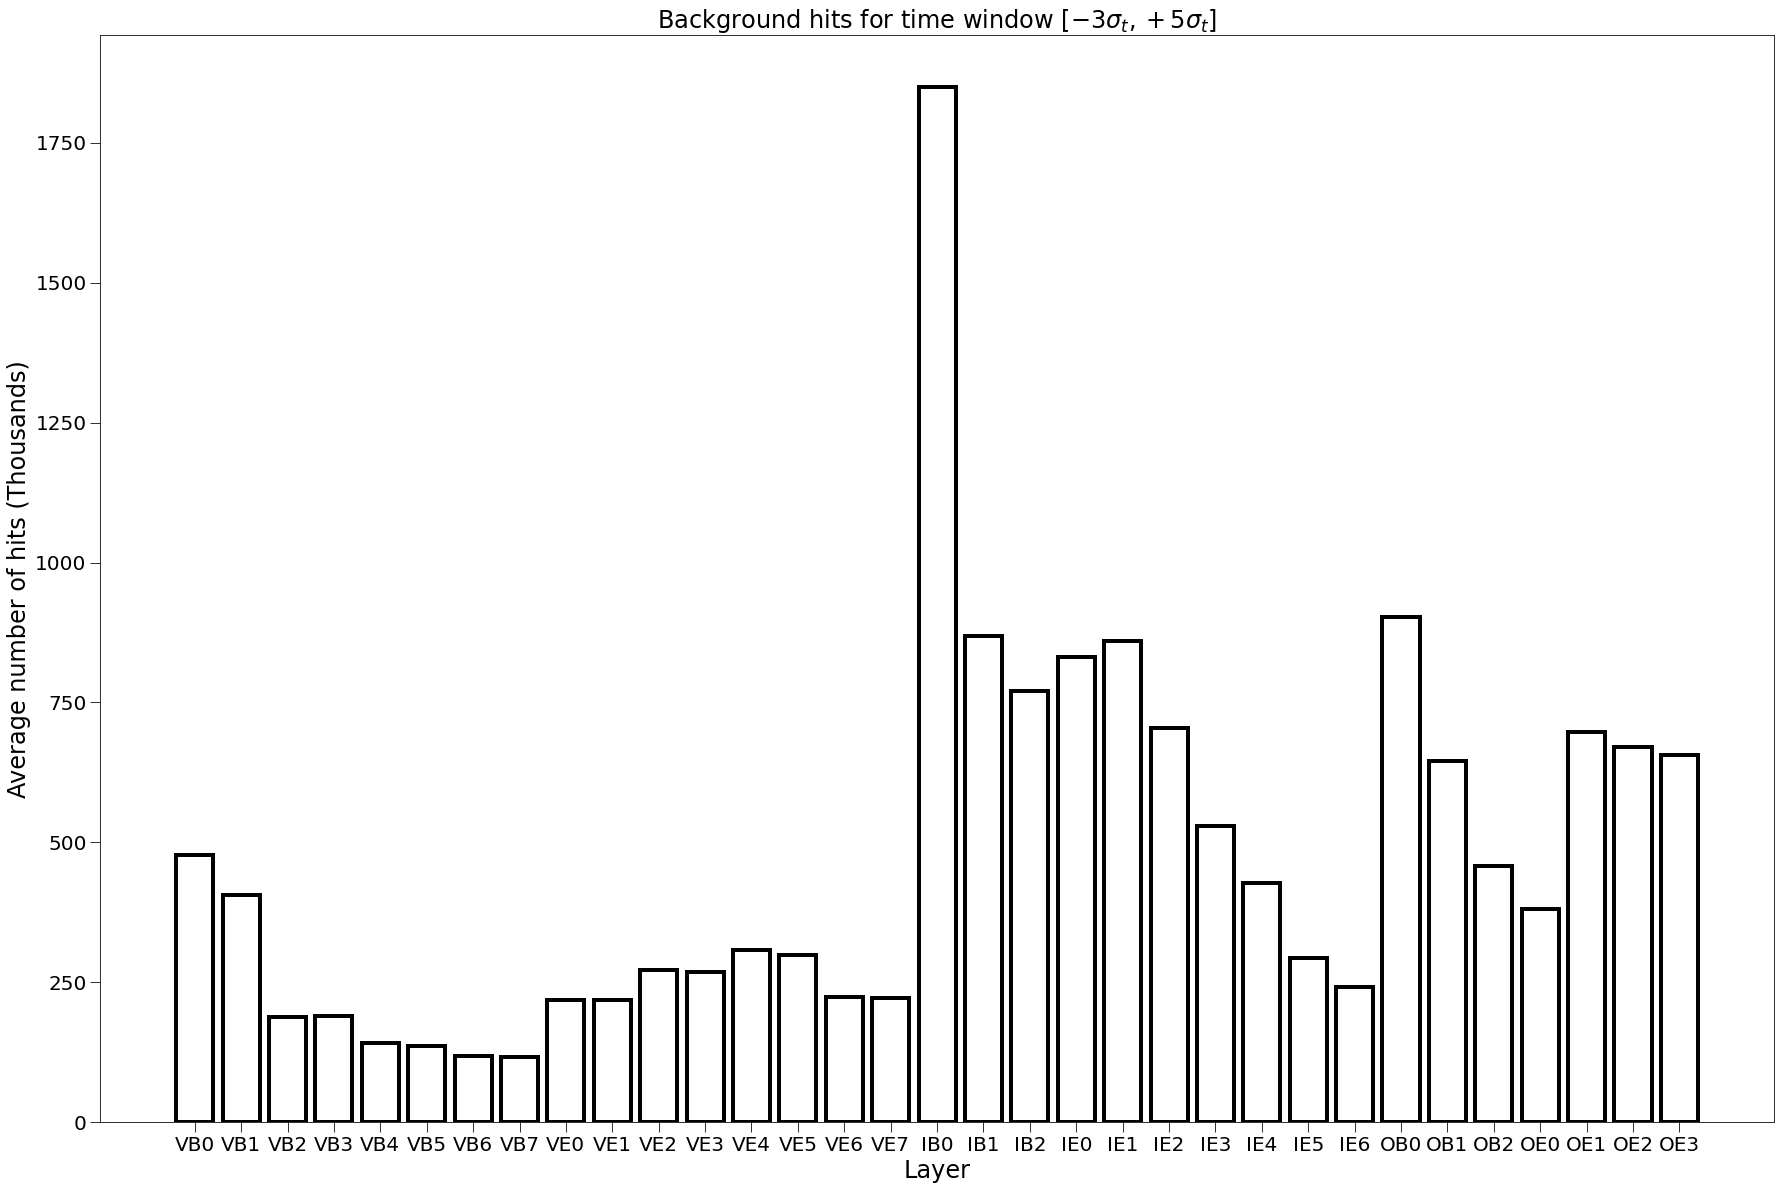

In [93]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
#plt.rcParams.update({'axes.labelsize' : "large"}) 

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
ax.bar(label, hits/1000, fill=False, linewidth=4)
ax.set_ylabel(f"Average number of hits (Thousands)")
ax.set_xlabel("Layer")
ax.set_title("Background hits for time window $[-3\sigma_t,+5\sigma_t]$")
plt.savefig("hits.png")

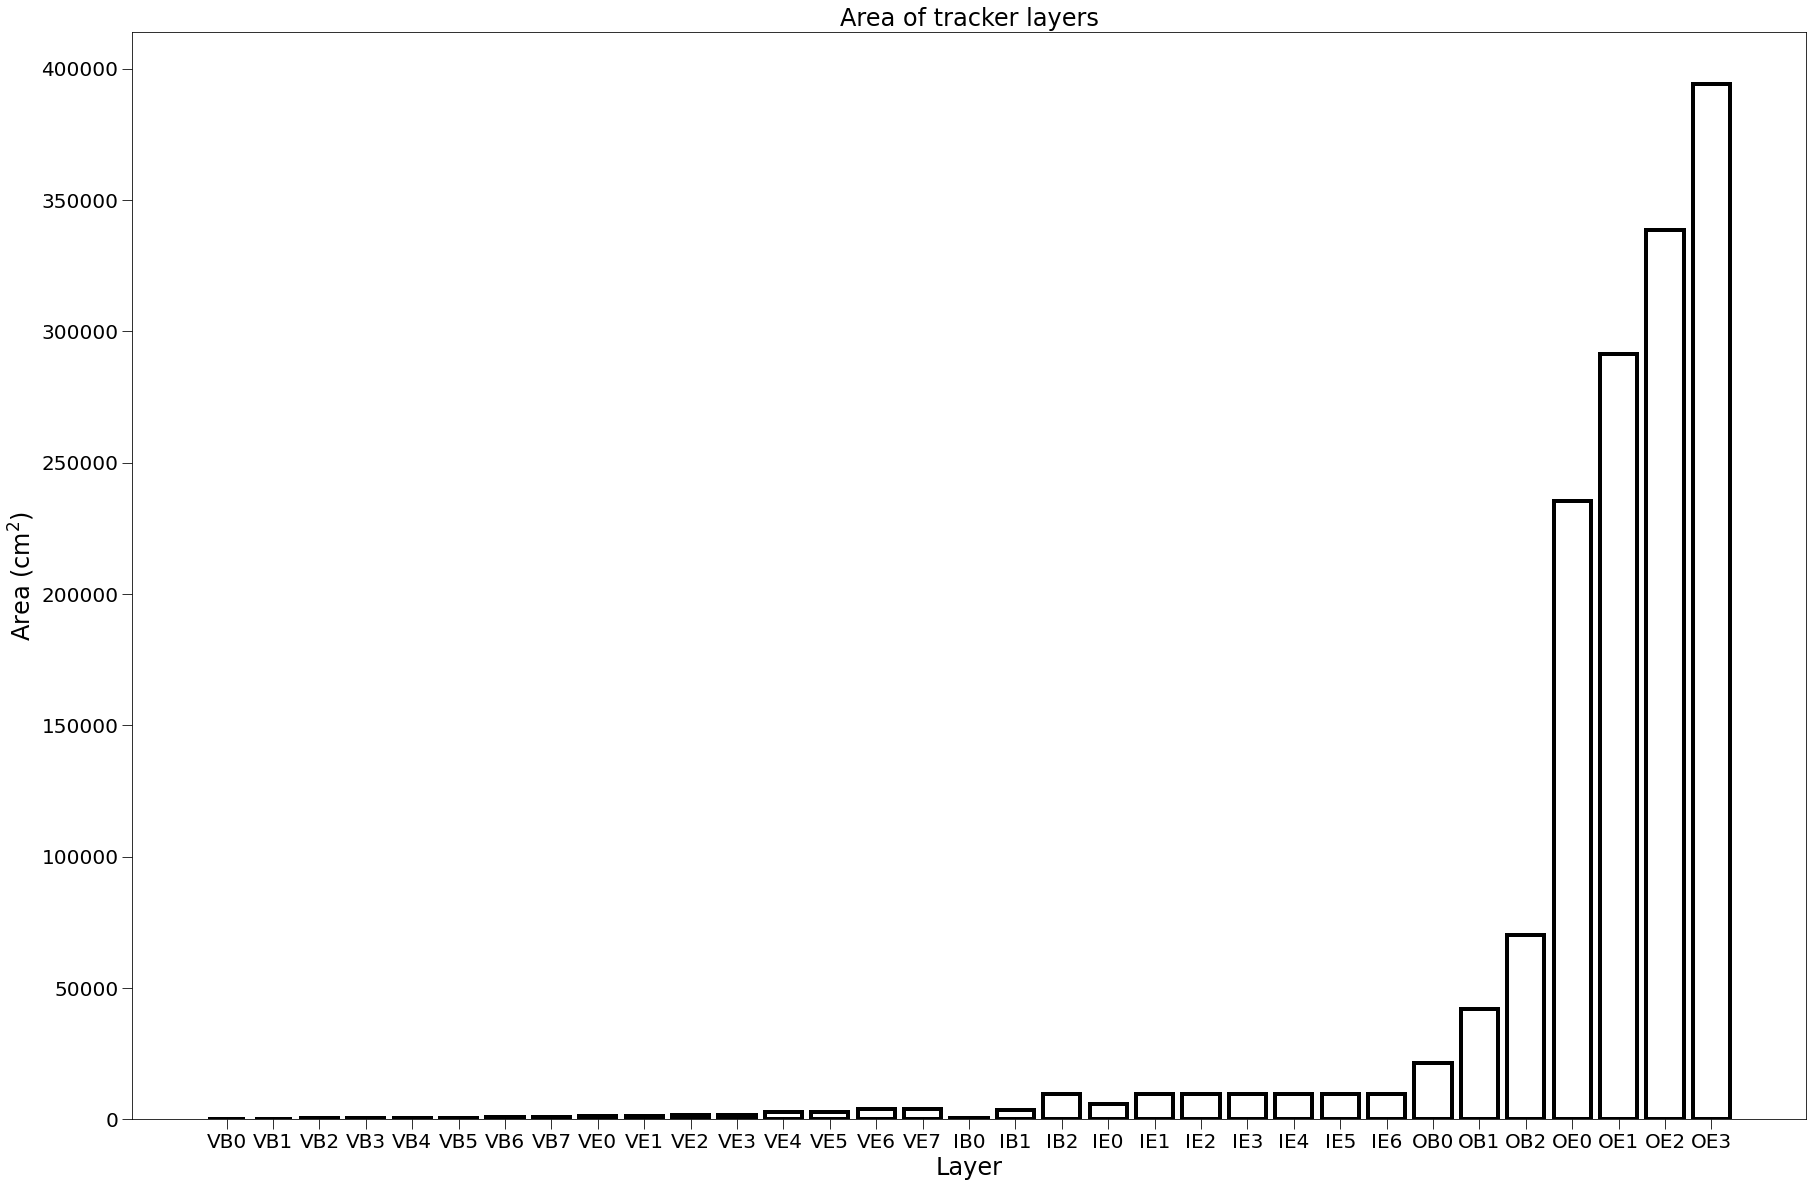

In [94]:
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size' : 10}) 
plt.rcParams.update({'ytick.major.size' : 10}) 
plt.rcParams.update({'xtick.minor.size' : 5}) 
plt.rcParams.update({'ytick.minor.size' : 5}) 
#plt.rcParams.update({'axes.labelsize' : "large"}) 

fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
ax.bar(label, surfacearea, fill=False, linewidth=4)
ax.set_ylabel(f"Area (cm$^2)$")
ax.set_xlabel("Layer")
ax.set_title("Area of tracker layers")
plt.savefig("area.png")